In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Importing OpenCV's CascadeClassifier function

In [2]:
face_clf = cv2.CascadeClassifier("HaarCascades/haarcascade_frontalface_default.xml")

# Uploading images

(1444, 2200, 3) (2152, 1560, 3)


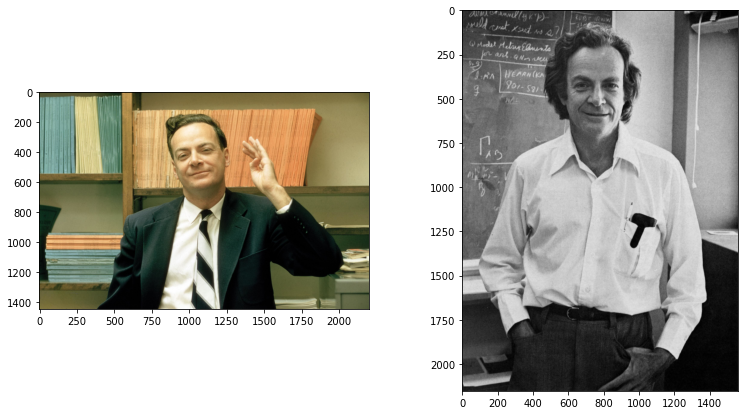

In [3]:
img_1 = cv2.cvtColor(cv2.imread("data/Feynman_1.jpeg"), cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(cv2.imread("data/Feynman_2.png"), cv2.COLOR_BGR2RGB)

print(img_1.shape, img_2.shape)

plt.figure(figsize=(13, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_1)
plt.subplot(1, 2, 2)
plt.imshow(img_2)

plt.show()

# Converting images to grayscale

(1444, 2200) (2152, 1560)


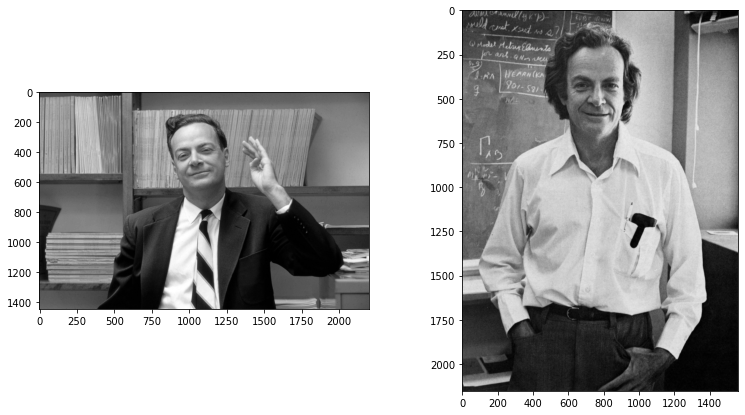

In [4]:
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

print(img_1_gray.shape, img_2_gray.shape)

plt.figure(figsize=(13, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_1_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img_2_gray, cmap='gray')

plt.show()

# Detection function

* Scale Factor = 1.3 - means, reducing the image by 30%
* Min Neighbors = 5 - specifies the number of neighbors each potential window should have in order to consider it a positive detection

In [5]:
def detect_face(img_input, gray):
    img = img_input.copy() 
    faces = face_clf.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),15)
        
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
            
    return img

# Testing

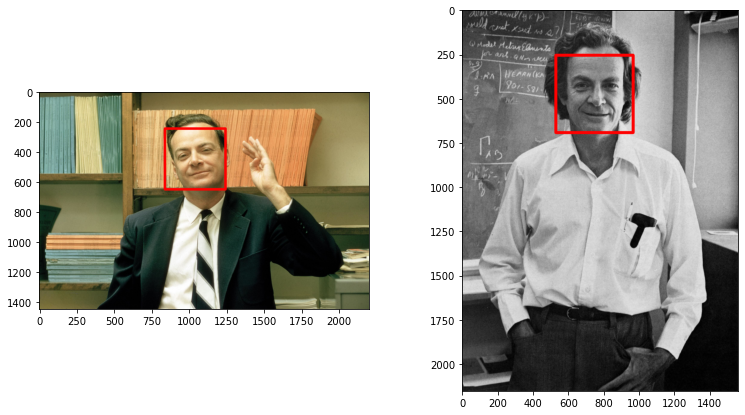

In [6]:
img_1_detected = detect_face(img_1, img_1_gray)
img_2_detected = detect_face(img_2, img_2_gray)

plt.figure(figsize=(13, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_1_detected)
plt.subplot(1, 2, 2)
plt.imshow(img_2_detected)

plt.show()

# Testing on concatenated image

In [7]:
img_1 = img_1[0:1000, 500:1500]
img_2 = img_2[0:1000, 300:1300]

concat_img = np.concatenate((img_1, img_2), axis=1)

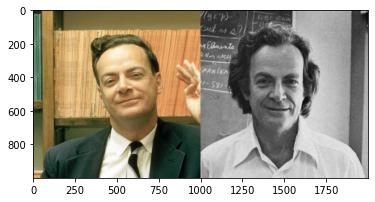

In [8]:
plt.imshow(concat_img)

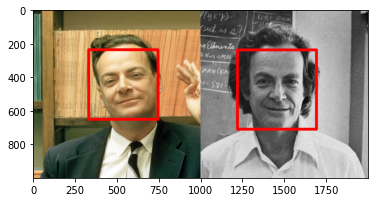

In [9]:
img_concat_detected = detect_face(concat_img, cv2.cvtColor(concat_img, cv2.COLOR_RGB2GRAY))

plt.imshow(img_concat_detected)